In [28]:

# Load libraries
from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier


In [29]:
# Open a file
dataset = pd.read_csv('normalizedData/normalized.csv')
dataset.groupby('label').size()

label
attack     9999
normal    28944
dtype: int64

In [43]:
# split dataset
array = dataset.values
X = array[:,2:12]
Y = array[:,12]
Y

array(['attack', 'attack', 'attack', ..., 'normal', 'normal', 'normal'],
      dtype=object)

In [44]:
validation_size = 0.25
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)
X_train_set, X_test, Y_train_set, Y_test = model_selection.train_test_split(X_train, Y_train, test_size=validation_size, random_state=seed)

# Test options and evaluation metric
scoring = 'accuracy'

# valuating algorithm model
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RFC', RandomForestClassifier()))

c:\Users\artyn\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR Accuracy: 0.933027 (+/- 0.095961)
LDA Accuracy: 0.995138 (+/- 0.000884)
KNN Accuracy: 0.999007 (+/- 0.000425)
CART Accuracy: 0.999726 (+/- 0.000205)
RFC Accuracy: 0.999829 (+/- 0.000108)


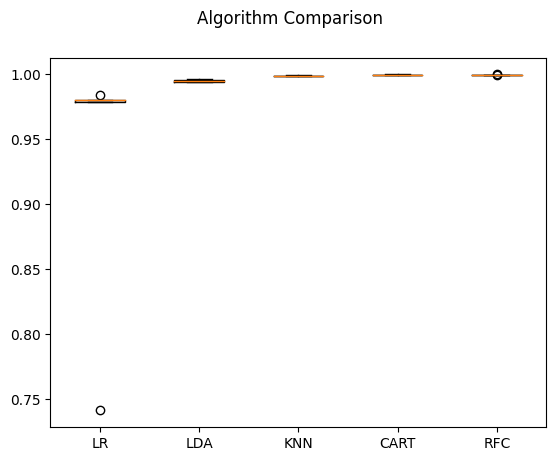

In [45]:

# evaluate each model in turn
results = []
names = []
for name, model in models:
        kfold = model_selection.KFold(n_splits=5)
        cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s Accuracy: %f (+/- %f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)

#Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

Validating Feature importance
[0.2004981  0.11467087 0.31395107 0.00943434 0.14563718 0.00580145
 0.04496532 0.1182064  0.01765824 0.02917703]


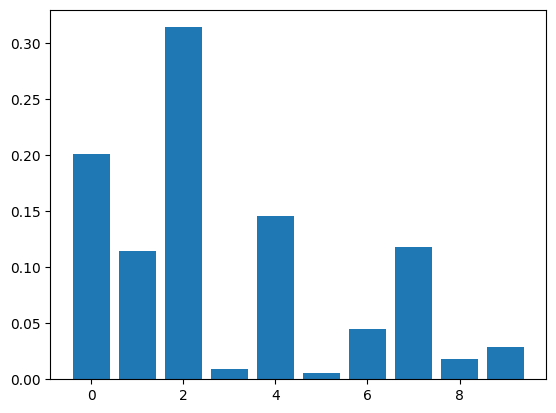

<Axes: >

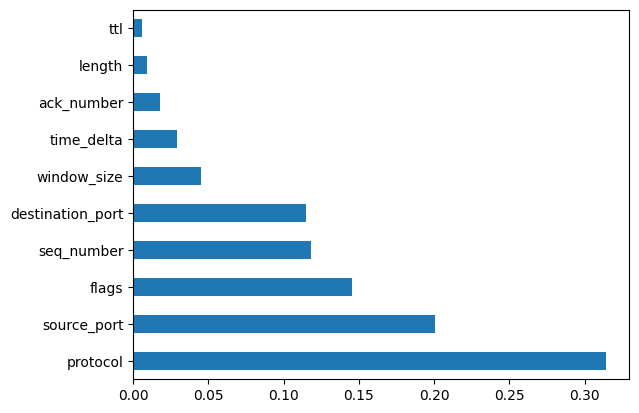

In [52]:

# Feature Importance
print ("Validating Feature importance")
# fit an Extra Trees model to the data
test_model = RandomForestClassifier()
test_model.fit(X_train, Y_train)
# display the relative importance of each attribute
print(test_model.feature_importances_)
# plot
plt.bar(range(len(test_model.feature_importances_)), test_model.feature_importances_)
plt.show()

feat_importances = pd.Series(test_model.feature_importances_, index=dataset.columns[2:12])
feat_importances.nlargest(20).plot(kind='barh')